In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Raisin_Dataset.csv')
df


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [ ]:
df.shape

(900, 8)

In [ ]:
df.info

<bound method DataFrame.info of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      1  
1    0.6841

In [ ]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=900, step=1)

In [ ]:
x=df.drop(['Class'],axis=1).values
y=df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8622222222222222

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[97, 18],
       [13, 97]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86       115\n           1       0.84      0.88      0.86       110\n\n    accuracy                           0.86       225\n   macro avg       0.86      0.86      0.86       225\nweighted avg       0.86      0.86      0.86       225\n'

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
y_proba=classifier.predict_proba(x_test)

In [ ]:
y_predicted=y_proba[:,1]

In [ ]:
print(y_predicted)

[0.4 0.6 0.2 1.  0.  0.  0.4 0.8 1.  0.2 0.  0.6 1.  0.4 0.2 0.4 0.4 0.
 0.2 0.4 0.8 0.  0.  0.  0.4 0.6 1.  0.  0.4 0.  0.8 0.  0.8 0.6 0.  0.
 1.  0.8 0.  0.6 0.8 1.  0.8 0.2 0.6 0.  0.4 0.8 0.8 0.  0.8 0.6 1.  0.6
 0.  0.8 1.  0.  0.8 1.  0.  0.8 1.  0.  0.  0.4 0.  0.  0.4 0.  0.2 0.
 1.  0.  0.8 0.4 0.  1.  0.8 1.  0.8 0.  0.  1.  0.  0.  0.  0.2 0.8 1.
 0.2 1.  0.2 0.  0.8 0.  0.8 0.  0.  1.  0.  1.  0.8 0.4 0.  0.  0.  0.4
 0.  0.  0.4 0.8 0.  1.  0.  0.  0.2 0.  1.  1.  0.  0.  0.  0.  1.  1.
 0.2 1.  1.  1.  0.6 0.8 0.4 0.  1.  0.2 0.  1.  0.2 0.  0.  0.4 1.  0.2
 0.8 0.4 1.  0.4 1.  0.  0.8 0.8 0.8 0.8 1.  0.2 1.  0.  0.8 1.  0.8 0.4
 1.  0.  0.  0.  0.6 1.  0.  1.  1.  1.  0.6 0.2 0.2 0.6 1.  0.  0.6 0.8
 0.8 0.8 1.  0.8 0.6 0.6 0.  1.  0.  0.  0.  1.  0.4 0.6 0.6 0.6 0.  0.4
 0.8 0.4 0.8 0.  1.  1.  1.  0.  0.  0.8 0.6 0.  1.  0.8 0.8 0.6 0.  0.8
 0.8 1.  1.  0.6 1.  1.  0.6 1.  1. ]


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model :",roc_auc)

Area under the curve for first model : 0.9081422924901186


Text(0, 0.5, 'TPR(Sensitivity)')

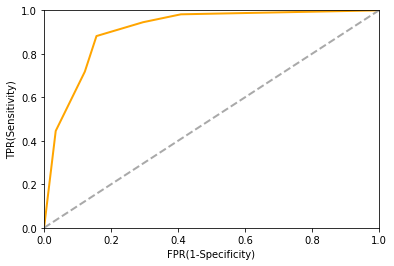

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR(1-Specificity)')
plt.ylabel('TPR(Sensitivity)')

In [ ]:
df.duplicated

<bound method DataFrame.duplicated of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      1  
1    

<function matplotlib.pyplot.show>

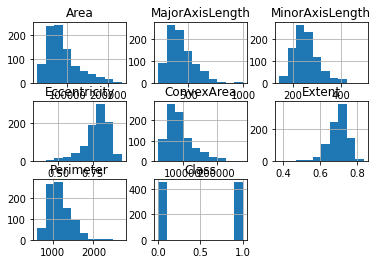

In [ ]:
import matplotlib.pyplot as plt
df.hist()
plt.show

<function matplotlib.pyplot.show>

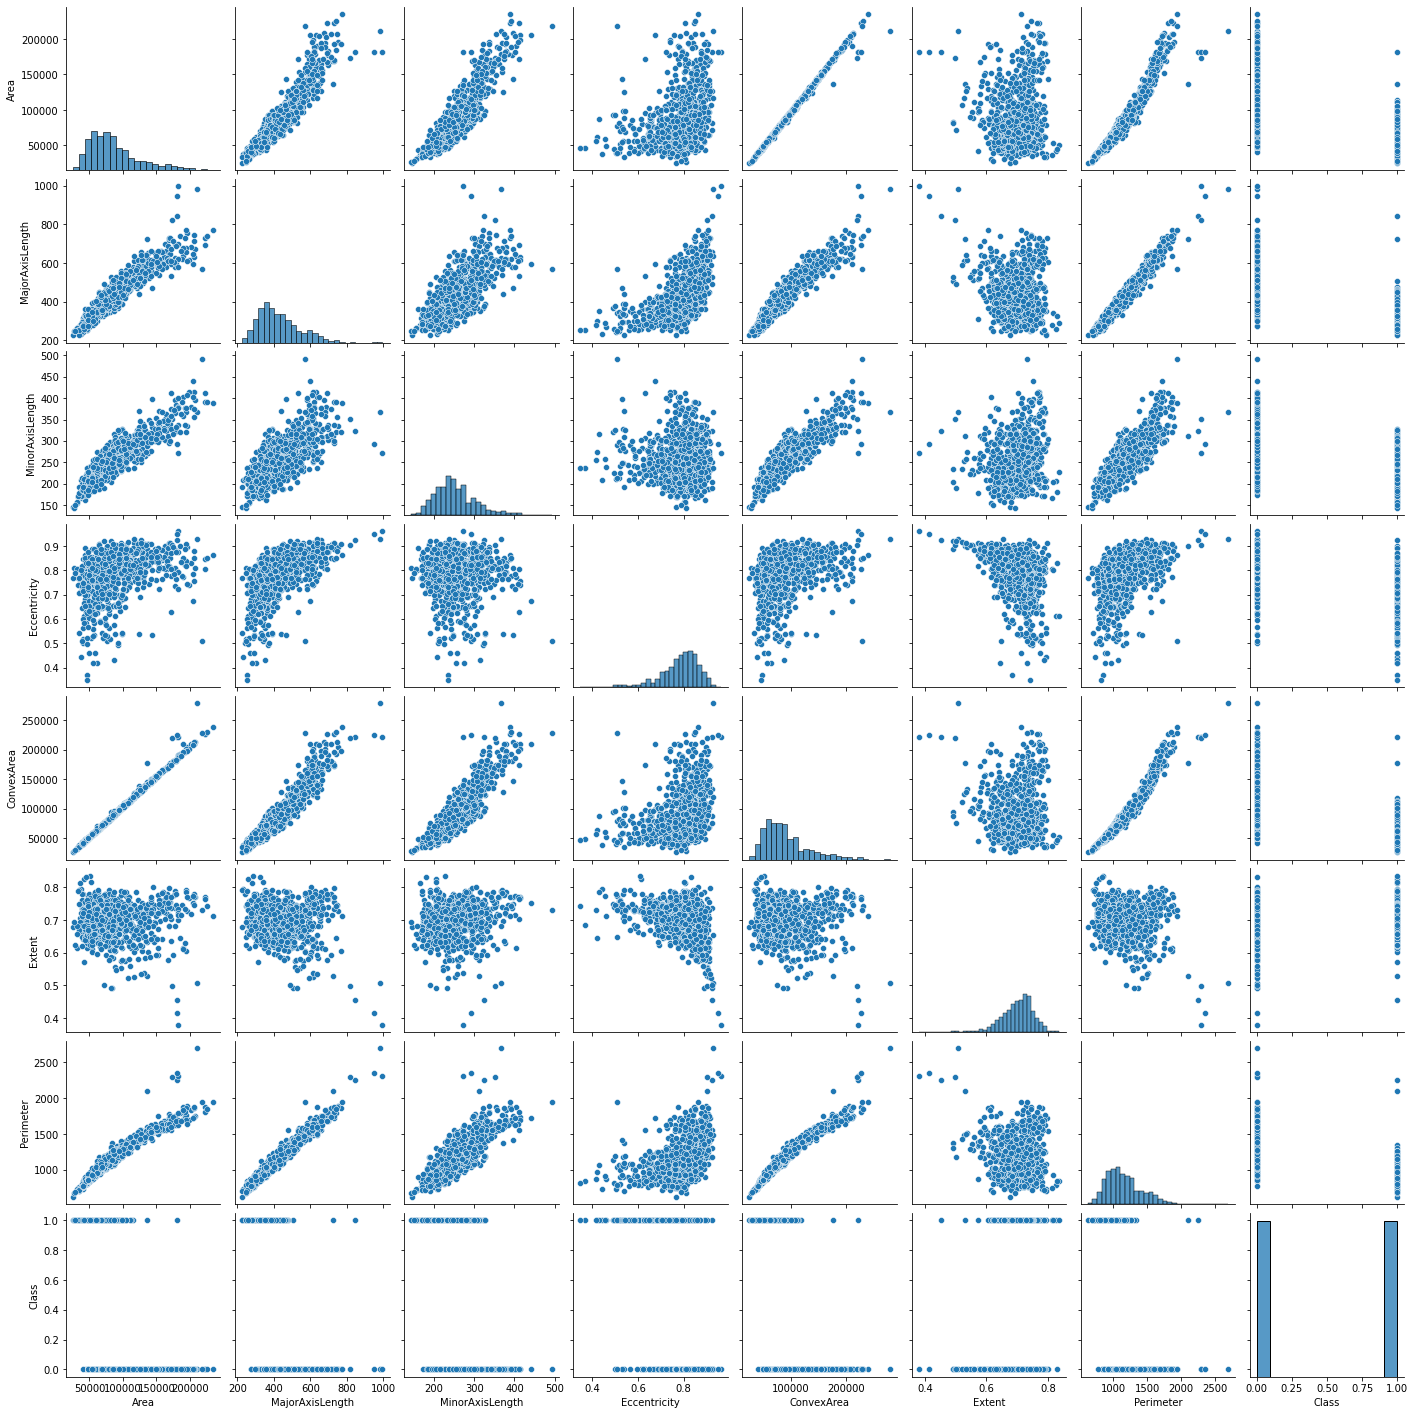

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show

<function matplotlib.pyplot.show>

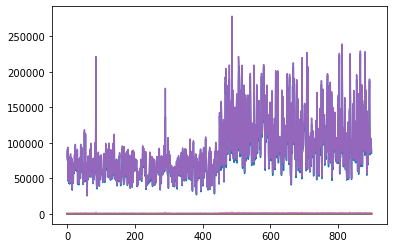

In [ ]:
plt.plot(df)
plt.show

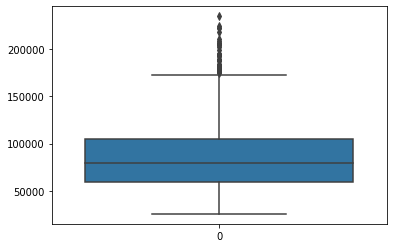

In [ ]:
sns.boxplot(data=df['Area'])

In [ ]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


In [ ]:
df=pd.get_dummies(df)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [ ]:
x=df.drop(['Area'],axis=1)
y=df['Area']

In [ ]:
from sklearn.model_selection import train_test_split 
x_test,x_train,y_test,y_train=train_test_split (x,y,test_size=0.2,random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 79057, 141137,  84260,  48488,  68119, 180898,  58460,  85894,
        58460,  85954,  59076,  58239, 117714, 102722, 111450,  58734,
        98464,  48488,  48488,  62835,  41809, 138202,  87089,  52508,
        97513,  79058,  69317,  58460, 100649, 102868, 102944,  66265,
        71452, 151908,  93430,  64988, 163082,  85894,  95546,  90176,
        66265,  88257,  65727,  88250,  88257,  64303, 163442,  87089,
       144250,  95364, 119336, 117714, 131811, 194864, 163082, 152992,
        88257, 123056,  33662, 163082,  52547, 169494,  95546,  75242,
       105091,  54428,  56903,  64303,  53006,  79057,  97254,  81546,
        61556,  77985, 113046, 151908,  81581,  44460,  55827,  53758,
        63514,  79057,  77985,  64988,  65091,  71452,  79058,  81456,
        52508,  79408,  56903,  97494, 141137,  85954, 120818, 222915,
        95546,  90176,  54968,  53006,  64303, 108379,  77985, 136180,
       131847,  61444,  90176,  64988,  87089,  98464, 113046,  66094,
      

In [ ]:
model.predict_proba(x_test)

array([[9.83035211e-036, 4.28029475e-047, 7.95178555e-032, ...,
        1.24991313e-214, 3.72828670e-294, 5.50164330e-318],
       [3.43627899e-269, 3.48259497e-296, 2.06159297e-258, ...,
        8.57692895e-046, 1.64085916e-092, 2.44164288e-109],
       [2.04211545e-049, 7.64704486e-062, 2.08568688e-045, ...,
        6.54466373e-167, 7.14137510e-235, 2.85180716e-254],
       ...,
       [4.01976335e-001, 8.61713012e-003, 4.31407578e-001, ...,
        2.81617418e-322, 0.00000000e+000, 0.00000000e+000],
       [1.63817846e-007, 1.32352050e-013, 4.84762454e-006, ...,
        4.69003645e-255, 0.00000000e+000, 0.00000000e+000],
       [3.60593706e-042, 1.78114428e-054, 9.96107678e-038, ...,
        2.08464884e-217, 2.15741152e-300, 0.00000000e+000]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
accuracy_score(y_test,y_pred)

0.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

       26908       0.00      0.00      0.00       1.0
       28216       0.00      0.00      0.00       1.0
       31237       0.00      0.00      0.00       1.0
       32097       0.00      0.00      0.00       0.0
       33565       0.00      0.00      0.00       1.0
       33615       0.00      0.00      0.00       1.0
       33662       0.00      0.00      0.00       0.0
       34559       0.00      0.00      0.00       1.0
       34638       0.00      0.00      0.00       1.0
       34977       0.00      0.00      0.00       1.0
       35237       0.00      0.00      0.00       1.0
       36145       0.00      0.00      0.00       1.0
       37302       0.00      0.00      0.00       1.0
       37569       0.00      0.00      0.00       1.0
       38545       0.00      0.00      0.00       0.0
       38569       0.00      0.00      0.00       1.0
       38585       0.00      0.00      0.00       1.0
       38724       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
model.predict_proba(x_test)

array([[9.83035211e-036, 4.28029475e-047, 7.95178555e-032, ...,
        1.24991313e-214, 3.72828670e-294, 5.50164330e-318],
       [3.43627899e-269, 3.48259497e-296, 2.06159297e-258, ...,
        8.57692895e-046, 1.64085916e-092, 2.44164288e-109],
       [2.04211545e-049, 7.64704486e-062, 2.08568688e-045, ...,
        6.54466373e-167, 7.14137510e-235, 2.85180716e-254],
       ...,
       [4.01976335e-001, 8.61713012e-003, 4.31407578e-001, ...,
        2.81617418e-322, 0.00000000e+000, 0.00000000e+000],
       [1.63817846e-007, 1.32352050e-013, 4.84762454e-006, ...,
        4.69003645e-255, 0.00000000e+000, 0.00000000e+000],
       [3.60593706e-042, 1.78114428e-054, 9.96107678e-038, ...,
        2.08464884e-217, 2.15741152e-300, 0.00000000e+000]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
accuracy_score(y_test,y_pred)

0.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

       26908       0.00      0.00      0.00       1.0
       28216       0.00      0.00      0.00       1.0
       31237       0.00      0.00      0.00       1.0
       32097       0.00      0.00      0.00       0.0
       33565       0.00      0.00      0.00       1.0
       33615       0.00      0.00      0.00       1.0
       33662       0.00      0.00      0.00       0.0
       34559       0.00      0.00      0.00       1.0
       34638       0.00      0.00      0.00       1.0
       34977       0.00      0.00      0.00       1.0
       35237       0.00      0.00      0.00       1.0
       36145       0.00      0.00      0.00       1.0
       37302       0.00      0.00      0.00       1.0
       37569       0.00      0.00      0.00       1.0
       38545       0.00      0.00      0.00       0.0
       38569       0.00      0.00      0.00       1.0
       38585       0.00      0.00      0.00       1.0
       38724       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1